Obtener el dataset de vino tinto de UCI:
https://archive.ics.uci.edu/ml/datasets/wine+quality

Enlace directo:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')

features = ['fixed acidity', 'volatile acidity',
            'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']
y = df['quality']
X = df[features]


Crea los datos de entrenamiento y test 20% para test.

Crea un modelo XGBRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Tu código aquí
modeloXGB = XGBRegressor()
modeloXGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Muestra un gráfico de barras de Permutation Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Tu código aquí
# Calculo de la importancia de las caracteristicas mediante permutación
r = permutation_importance(modeloXGB, X_test, y_test, n_repeats=30, random_state=0)
# Obtengo los resultados y caracteristicas
perm_importance = r.importances_mean
feature_names = X_test.columns

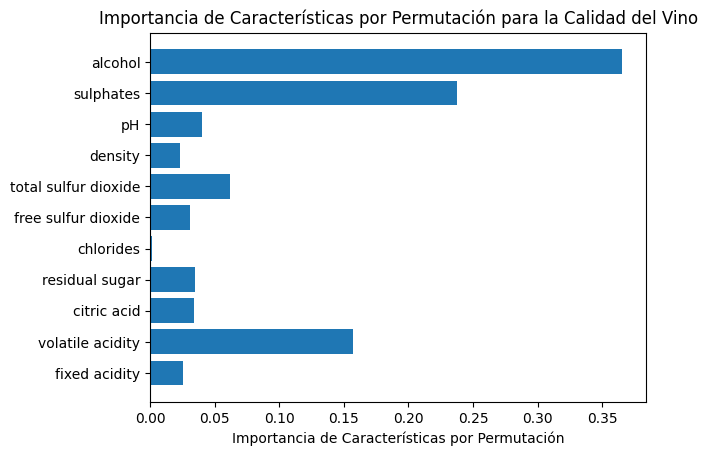

In [ ]:
# Grafico
plt.barh(feature_names, perm_importance)
plt.xlabel('Importancia de Características por Permutación')
plt.title('Importancia de Características por Permutación para la Calidad del Vino')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
# The SHAP Values
import shap
shap.initjs()
explainer = shap.Explainer(modeloXGB)
shap_values = explainer(X_test)

Muestra los 10 primeros features usando shap.plots.bar()

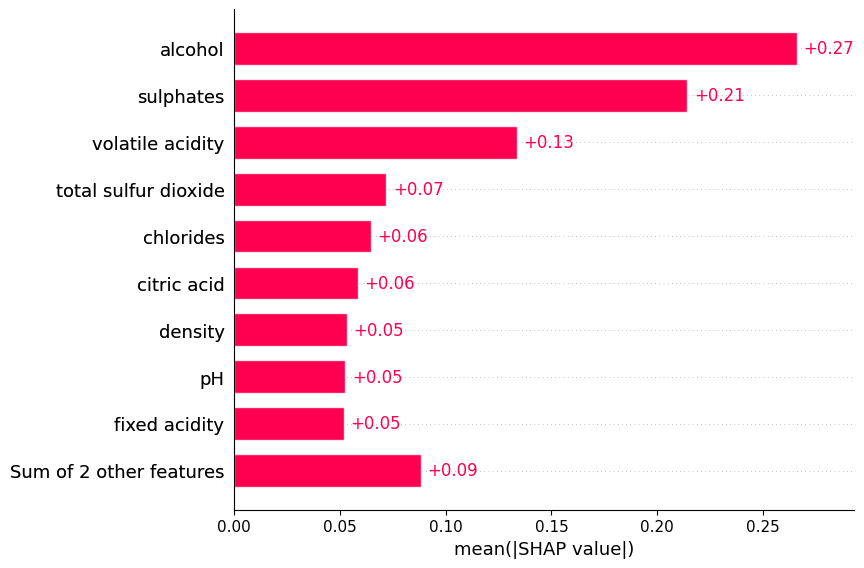

In [ ]:
shap.plots.bar(shap_values, max_display=10, show= True)

 Muestra un bar_plot de la primera muestra del X_test

In [ ]:
# Tu código aquí
primeramuestra_Xtest = shap_values[0].values
primeramuestra_Xtest

array([ 0.13967542, -0.12638928,  0.09130287,  0.01205337, -0.08078307,
        0.00336612, -0.03140359, -0.07933696, -0.02824584,  0.0721821 ,
       -0.36545599], dtype=float32)

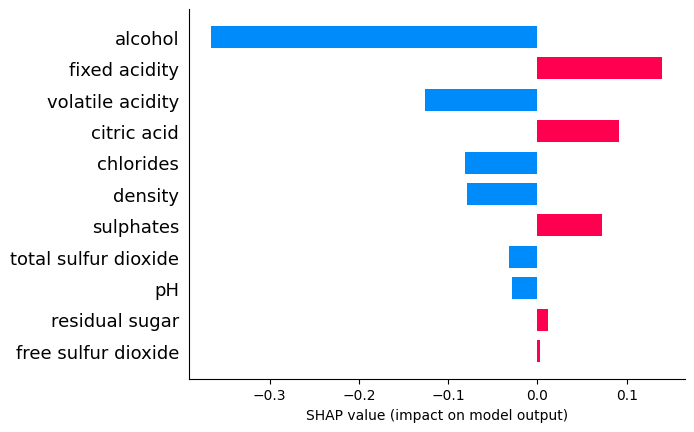

In [ ]:
shap.bar_plot(primeramuestra_Xtest, max_display=len(X_test.columns), feature_names= features, show= True)

Muestra un waterfall de la primera muestra del X_text

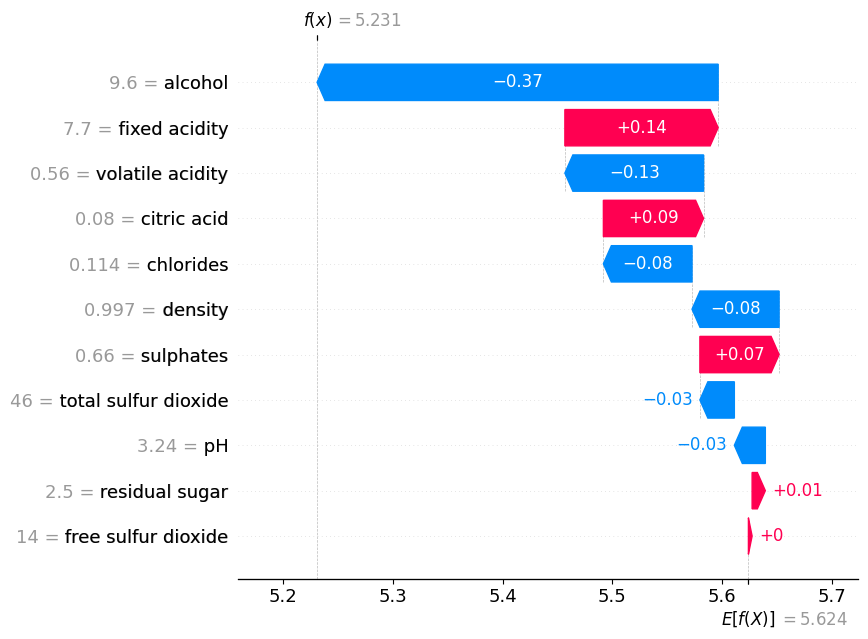

In [ ]:
# Tu código aquí
shap.waterfall_plot(shap_values[0], max_display=11)

Muestra un decision_plot de la primera muestra del X_text

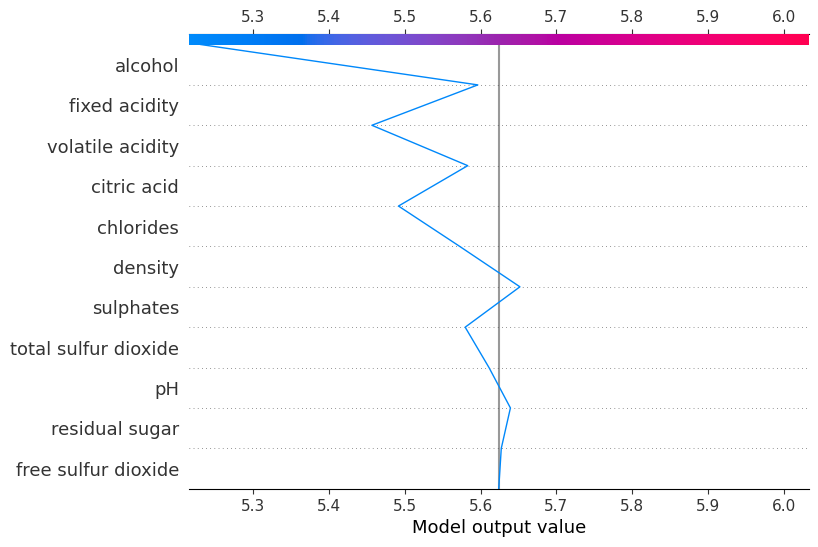

In [ ]:
# Tu código aquí
shap.decision_plot(explainer.expected_value, primeramuestra_Xtest, feature_names= X_test.columns.values.tolist())

Muestra un force_plot de la primera muestra del X_text

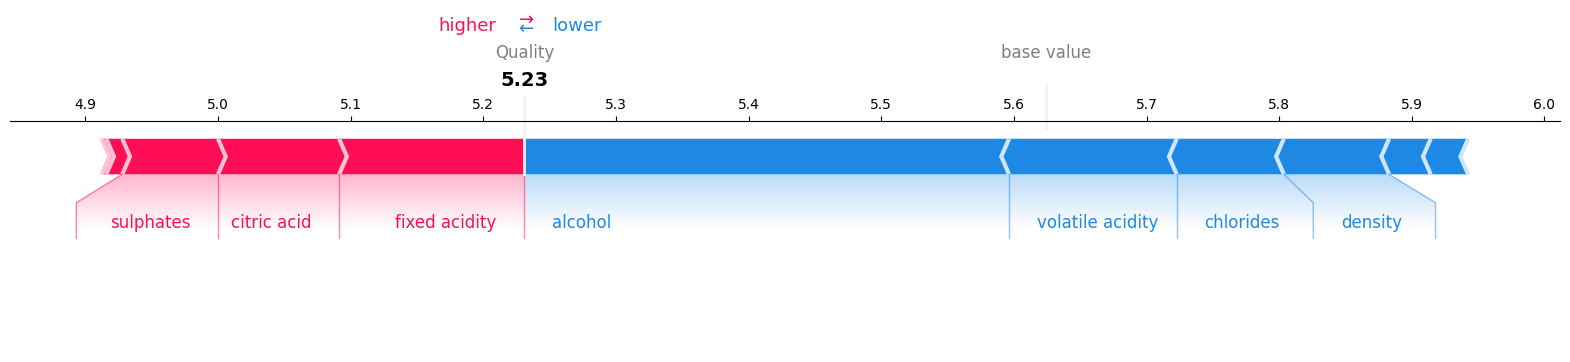

In [ ]:
shap_values_2 = explainer.shap_values(X_test[0:1])
shap.force_plot(explainer.expected_value, explainer.shap_values(X_test[0:1]), feature_names=X_test.columns.values, out_names= "Quality", matplotlib=True)

Muestra un summary_plot de X_text

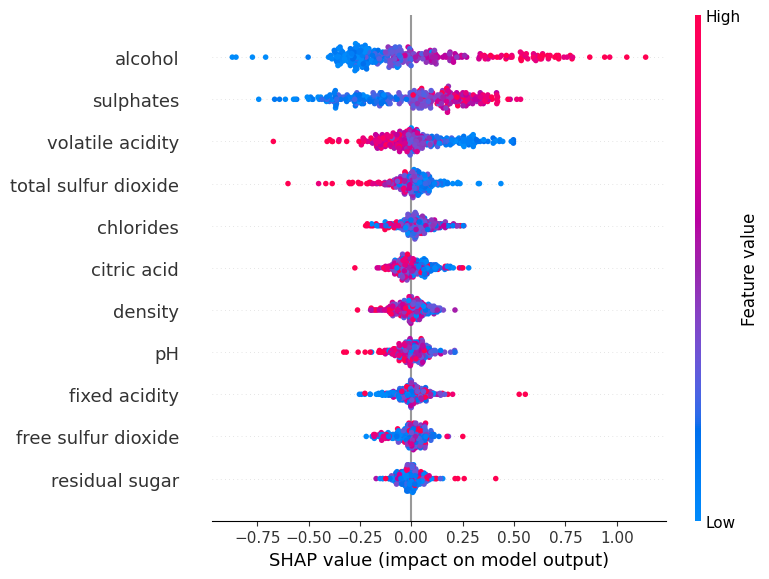

In [ ]:
# Tu código aquí

shap.summary_plot(shap_values, feature_names=X_test.columns.tolist())